# Assignment 3

# Task 1 - Train and Evaluate a KNN Classifier on the Connect-4 Dataset

## 1.1 - Import the necessary libraries

In [85]:
# Importing the libraries

# YOUR CODE HERE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 1.2 - Load and pre-process the dataset

In [120]:
data_path = './Data/connect-4.data.txt'

column_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
                'e1', 'e2', 'e3', 'e4', 'e5', 'e6',
                'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
                'g1', 'g2', 'g3', 'g4', 'g5', 'g6',
                'class']

# Load the data into a pandas dataframe using the column names defined above
# YOUR CODE HERE
df = pd.read_csv(data_path)
df.columns = column_names

In [121]:
# Print the shape of the dataframe
# YOUR CODE HERE
print(df.shape)

# Show the first 5 rows of the dataframe
# YOUR CODE HERE
df.head()

(67556, 43)


,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win


In [122]:
# Check for null entries
# YOUR CODE HERE
df.isnull().sum()

a1       0
a2       0
a3       0
a4       0
a5       0
a6       0
b1       0
b2       0
b3       0
b4       0
b5       0
b6       0
c1       0
c2       0
c3       0
c4       0
c5       0
c6       0
d1       0
d2       0
d3       0
d4       0
d5       0
d6       0
e1       0
e2       0
e3       0
e4       0
e5       0
e6       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
g1       0
g2       0
g3       0
g4       0
g5       0
g6       0
class    0
dtype: int64

In [123]:
# Check for missing values
# YOUR CODE HERE
df.isna().sum()

a1       0
a2       0
a3       0
a4       0
a5       0
a6       0
b1       0
b2       0
b3       0
b4       0
b5       0
b6       0
c1       0
c2       0
c3       0
c4       0
c5       0
c6       0
d1       0
d2       0
d3       0
d4       0
d5       0
d6       0
e1       0
e2       0
e3       0
e4       0
e5       0
e6       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
g1       0
g2       0
g3       0
g4       0
g5       0
g6       0
class    0
dtype: int64

### Convert the class labels to numerical values
Use the `map` function to convert the class labels to numerical values, similar to what we did in the Iris dataset.

In [127]:
# Converting the class labels to numerical values

label_dict = {
    'win':0,
    'loss':1,
    'draw':2 
    }

# YOUR CODE HERE
df["ClassLabel"] = df['class'].map(lambda x: label_dict[x])
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f5,f6,g1,g2,g3,g4,g5,g6,class,ClassLabel
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,win,0
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,win,0
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,win,0
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,win,0
4,b,b,b,b,b,b,b,b,b,b,...,b,b,o,b,b,b,b,b,win,0


<AxesSubplot:>

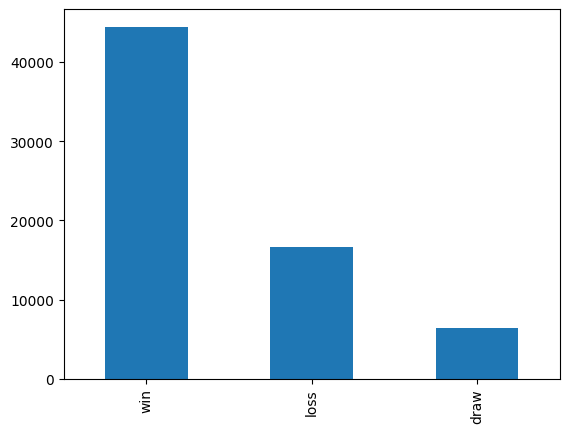

In [126]:
# Show a histogram of the class labels. Use the 'class' column for this. 

# YOUR CODE HERE
df['class'].value_counts().plot(kind="bar")


### Convert the attributes to numerical values

Use the `applymap` function and a `lambda` function to convert the attributes to numerical values.

In [130]:
# attribute map
attribute_dict = {
    'x':0,
    'o':1,
    'b':2
    }

# YOUR CODE HERE

df = df.applymap(lambda x: attribute_dict[x] if x in attribute_dict else x)

## 1.3 - Split the dataset into training and testing sets

In [131]:
# Assign the features to a numpy matrix called X and the class labels to a numpy vector called y

# YOUR CODE HERE

X = df[[chr(ord('a')+y)+str(x+1) for y in range(7) for x in range(6)]].to_numpy()
y = df["ClassLabel"].to_numpy()

In [132]:
# Split the data into training and test sets. Use 30% of the data for testing and a random state of 42

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42,
                                                    shuffle=True)

In [133]:
# Print the shapes of the training and test sets

# YOUR CODE HERE
print(X_train.shape)
print(X_test.shape)

(47289, 42)
(20267, 42)


## 1.4 - Train and evaluate a kNN classifier

Train a kNN classifier using the training set and predict the labels of the test set. Use k=1. Report the accuracy of the classifier.

**Note:** As a distance metric, use the **Hamming** distance metric. Refer to the documentation of the `sklearn.neighbors.KNeighborsClassifier` class. The metric can be specified using the `metric` parameter of the `KNeighborsClassifier`, as `metric='hamming'`.


In [134]:
# Fit the KNN model to the training data

# YOUR CODE HERE
classifier = KNeighborsClassifier(metric="hamming", n_neighbors=1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='hamming', n_neighbors=1)

In [135]:
# Evaluate the model on the test data using classification accuracy and report the results.
# Note, this may take some time to run. It takes about 30 seconds on my machine.

# YOUR CODE HERE
classifier.score(X_test, y_test)

0.6642324961760497

# Task 2 - Fine tune the hyperparameter k of a kNN classifier

### Split the data into training, validation and test sets, using a 60:20:20 split

In [136]:
# Split the data into training, validation and test sets. Use a 60:20:20 split. Use a random state of 42.

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=True)


Print the shape of the training, validation and test sets. Check the numbers to make sure that the split is correct.

In [137]:
# Print the shapes of the training, validation and test sets

# YOUR CODE HERE
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(40533, 42)
(13512, 42)
(13511, 42)


### Tune the value of k using the validation set

Tune the value of k using the validation set for values from 1 to 30. Use the Hamming distance metric. Report the accuracy of the classifier on the validation set for each value of k. Plot the accuracy of the classifier on the validation set for each value of k. Report the value of k that gives the best accuracy on the validation set.

k = 1, acc = 0.664421582414329
k = 2, acc = 0.7185996595366738
k = 3, acc = 0.7320701650506994
k = 4, acc = 0.751535785656132
k = 5, acc = 0.7642661535045518
k = 6, acc = 0.7738139293908667
k = 7, acc = 0.7811412922803641
k = 8, acc = 0.78188142994597
k = 9, acc = 0.7872104211383317
k = 10, acc = 0.7899489305010732
k = 11, acc = 0.7919473021982089
k = 12, acc = 0.7918732884316483
k = 13, acc = 0.7933535637628599
k = 14, acc = 0.7933535637628599
k = 15, acc = 0.794389756494708
k = 16, acc = 0.7915032195988454
k = 17, acc = 0.792613426097254
k = 18, acc = 0.7915032195988454
k = 19, acc = 0.7926874398638146
k = 20, acc = 0.7893568203685886
k = 21, acc = 0.790689068166679
k = 22, acc = 0.788764710236104
k = 23, acc = 0.7882466138701798
k = 24, acc = 0.7854340907408778
k = 25, acc = 0.7828436089112575
k = 26, acc = 0.7815113611131671
k = 27, acc = 0.7812893198134853
k = 28, acc = 0.7789948930501073
k = 29, acc = 0.7783287691510621
k = 30, acc = 0.7751461771889572


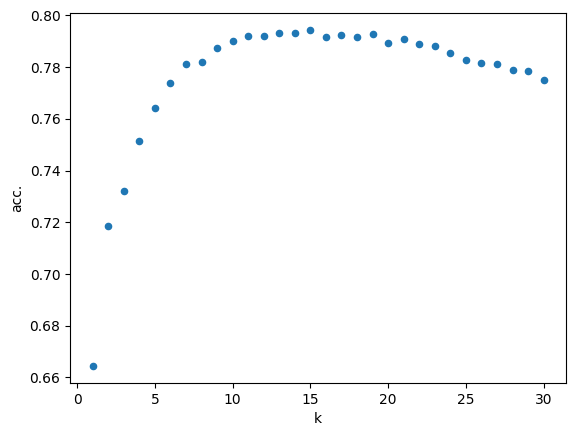

In [138]:
# YOUR CODE HERE
values = [[k] for k in range(1,31)]
for k in range(1,31):
    classifier = KNeighborsClassifier(metric="hamming", n_neighbors=k)
    classifier.fit(X_train,y_train)
    score = classifier.score(X_val, y_val)
    values[k-1].append(score)
    print("k = "+str(k) + ", acc = " + str(score))

acc_plot = pd.DataFrame(values,columns=['k', 'acc.'])
ax1 = acc_plot.plot.scatter(x='k', y='acc.')

### Evaluate the classifier on the test set

Train a kNN classifier using the training set and predict the labels of the test set. Use the value of k that gave the best accuracy on the validation set. Report the accuracy of the classifier on the test set.

In [139]:
classifier = KNeighborsClassifier(metric="hamming", n_neighbors=15)
classifier.fit(X_train,y_train)
classifier.predict(X_test)
classifier.score(X_test,y_test)

0.7871521610420367